### Crop Image's

In [1]:
import os, sklearn, pandas, numpy as np
from sklearn import svm
import skimage
from skimage import io, filters
from utils import utils # custom functions, in local environment
import matplotlib.pyplot as plt
%matplotlib inline
import config # params, constants
import data # functions that mutate our data

 Dataset :: namedtuple(
    ['train' = ['img_name']
    , 'test' = ['img_name']
    , 'labels' = pandas.df('img_name','breed')
    , 'dict_index_to_label' = dict to convert label_index -> label_name
    , 'dict_label_to_index'= dict to convert label_name -> label_index
    


In [2]:
import data # src/data.py
dataset = data.init_dataset()

In [3]:
# Import train+test data
img_dir = config.dataset_dir + 'train/'
img_list = dataset.train # ignore the test images for now
img_name = img_list[0]
img = data.read_img('train/',img_name)

In [4]:
# function to crop the image to the center of image. 
def crop_center(img):
    cropx = 97
    cropy = 102
    y,x,z = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)  
    return img[starty:starty+cropy,startx:startx+cropx]

In [5]:
# function to crop the image to one of the corners of the image. 
def crop_corner(img, corner):
    y,x,z = img.shape
    cropx = 97
    cropy = 102
    if corner == 'top_left':
        startx = 0
        starty = 0
    elif corner == 'top_right':
        startx = x - cropx
        starty = 0
    elif corner == 'bottom_left':
        startx = 0
        starty = y - cropy
    elif corner == 'bottom_right':
        startx = x - cropx
        starty = y - cropy
            
    return img[starty:starty+cropy,startx:startx+cropx]

In [6]:
def crop_all_corners(img):
    img_1 = crop_corner(img, 'top_left')
    img_2 = crop_corner(img, 'top_right')
    img_3 = crop_corner(img, 'bottom_left')
    img_4 = crop_corner(img, 'bottom_right')
    return img_1, img_2, img_3, img_4

In [7]:
# function to find the smallest x and y value of all images,
# center crop function is now set to crop always to the smallest values. 
def find_smallest_x_y(img_list):
    smallest_y = 1000
    smallest_x = 1000
    for img_name in img_list:
        img = data.read_img('train/',img_name)
        if img.shape[0] < smallest_y:
            smallest_y = img.shape[0]
        if img.shape[1] < smallest_x:
            smallest_x = img.shape[1]
    return smallest_y, smallest_x

In [8]:
find_smallest_x_y(img_list[0:1000])

(140, 120)

In [93]:
# np.pad is a function to add padding to an image, i was intending to use this to fill the missing part of the smaller 
# images with white or black, but it doesn't seem to work. Don't know if we still want to use it so...
img = data.read_img('train/',img_list[0])
# type(img)
img.shape
# img = np.pad(img, (100), 'constant', constant_values=(0))

(375, 500, 3)

In [92]:
skimage.io.imshow(img)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x10d3dc268> (for post_execute):


ValueError: 3-dimensional arrays must be of dtype unsigned byte, unsigned short, float32 or float64

ValueError: 3-dimensional arrays must be of dtype unsigned byte, unsigned short, float32 or float64

[[1 2]
 [3 4]
 [0 0]
 [0 0]
 [0 0]]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


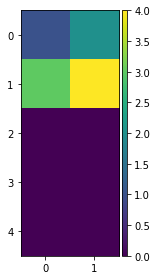

In [38]:
img = np.array([[1,2],[3,4]])
# img = np.stack([img,img,img])
img_ = np.pad(img, ([0,3],[0,0]), 'constant', constant_values=(0))
print(img_)
skimage.io.imshow(img_)

In [83]:
img = np.array([[1,2],[3,4]])
img = np.stack([img,img,img])
img = np.pad(img, ([0,0],[1,0],[0,0]), 'constant', constant_values=(0))
print(img)
# skimage.io.imshow(img)

[[[0 0]
  [1 2]
  [3 4]]

 [[0 0]
  [1 2]
  [3 4]]

 [[0 0]
  [1 2]
  [3 4]]]


In [118]:
# c1 = np.array([1,0,0])
# c2 = np.array([0,1,0])
# cell = np.stack([c1,c2])
# img = np.stack([cell,cell])
# # img = np.array([[c1,c1],[c1,c2]])
# img.shape
# # img = np.array([[1,2],[3,4]])
# # zeros = np.zeros([2,2])
# # img = np.stack([zeros,zeros,zeros])
# # img = np.stack([img,img,img])
# skimage.io.imshow(img)
# # type(img)

In [119]:
# np.pad is a function to add padding to an image, i was intending to use this to fill the missing part of the smaller 
# images with white or black, but it doesn't seem to work. Don't know if we still want to use it so...
img = data.read_img('train/',img_list[0])
# type(img)
img.shape

(375, 500, 3)

In [122]:
img = np.pad(img, ([0,100],[0,0],[0,0]), 'constant', constant_values=(255))
img.shape

(485, 500, 3)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


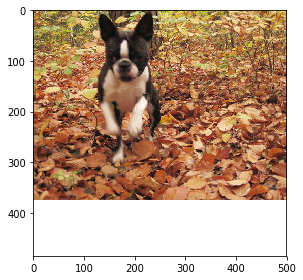

In [123]:
skimage.io.imshow(img)